#### Definition
1. mm, s, radian, keV unless specified otherwise in the plot 
3. The coordinate convention of this simulation and its relation to XPP coordinate is 
    (axis 0, axis 1, axis 2) = (vertical, horizontal, propagation) = (xpp y, xpp x, xpp z) 

np.fft(field) = spectrum

np.ifft(spectrum) = field

# Important !!!

In [1]:
# Whether use gpu-based wave-optics simulation or not.
# With gpu=False, only ray-tracing calculation is performed. 
gpu = False

In [2]:
import sys

sys.path.append("../../../../XRaySimulation")

import numpy as np
import matplotlib.pyplot as plt
from XRaySimulation import util, DeviceSimu, Pulse

# Level 1: simulate the XPP and the X-ray
import Controller

if gpu:
    import gpuWaveOptics

# Level 2: Develop the auto-alignment algorithm which control either the simulator or XPP controller through the parser.
import parser

plt.rcParams.update({'font.size': 12})

## 1. Start the simulation

In [3]:
# Create a controller object as we have at XPP
x = Controller.XppController_TG()

sase_source = Pulse.saseSource(nx=32, ny=32, nz=1024,
                               dx=4, dy=4, dz=0.1, Ec=9.8,
                               mean_pulse_energy_uJ=600,  # uJ.  10 uJ / 0.5eV * 30 eV = 600 uJ
                               pulse_energy_sigma_uJ=100,
                               # SASE energy fluctuation. Not the fluctuation after the xpp mono
                               n_gaussian=500,
                               mode_size_x=15,
                               mode_size_y=15,
                               mode_size_z=0.15 * util.c,
                               mode_center_spread_x=20,
                               mode_center_spread_y=20,
                               mode_center_spread_z=20 * util.c,
                               x0=np.array([0, -50e3, -30e6]))

Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, ro

### Define functions on the fly

In [4]:
def move_vcc_zero():
    _ = x.t2.x_umv(0)
    _ = x.t3.x_umv(0)
    
def move_vcc(val):
    _ = x.t2.x_umvr(val)
    _ = x.t3.x_umvr(-val)

def move_sample():
    print("Move sample tower to sample")
    print("Move sample.z")
    _ = x.sample.z_umv(11565.5671)
    print("Move sample.x")
    _ = x.sample.x_umv(22804.9636)

def move_yag():
    print("Move sample tower to yag")
    print("Move sample.z")
    _ = x.sample.z_umv(0)
    print("Move sample.x")
    _ = x.sample.x_umv(0)

def move_sample_yag():
    pass

def optimize_miniSD_alignment(gpu_flag=gpu):
    pass

def optimize_CC_VCC_overlap(gpu_flag=gpu):
    pass

### Development the auto-alignment algorithm in this cell

In [5]:
pass

### Preparation: Align the mono

Motor moved from 0.00000 to -17.88927 degree
Motor moved from 0.00000 to -17.88927 degree
Motor moved from -17.88927 to -17.89086 degree
Motor moved from -17.88927 to -17.89107 degree


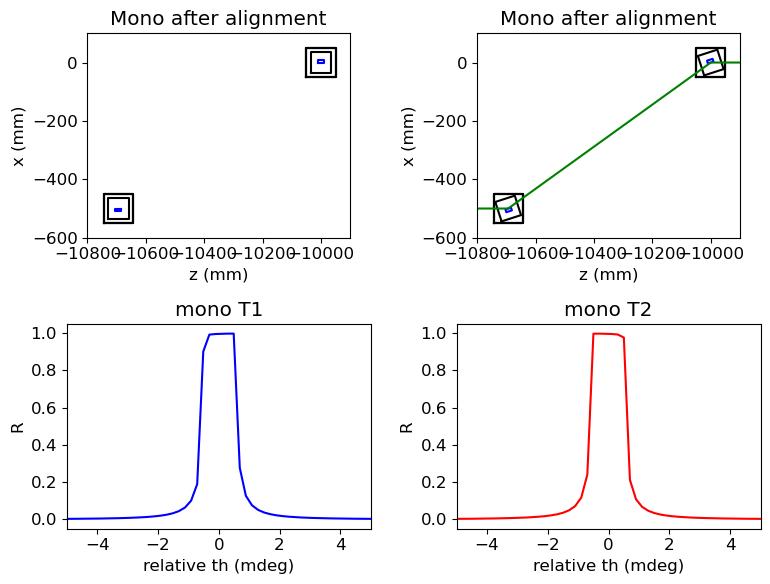

In [6]:
# Prepare a canvas. This section is not important. 
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.set_figheight(6)
fig.set_figwidth(8)

# show mono before alignment
x.plot_mono_optics(ax=ax[0, 0])

# show mono after alignment
_ = x.align_xpp_mono()
x.plot_mono_optics(ax=ax[0, 1], show_trajectory=True)
x.plot_mono_rocking(ax_mono_t1=ax[1, 0], ax_mono_t2=ax[1, 1])

plt.tight_layout()
plt.show()

### Preparation: Align the miniSD

Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 19.23525 to 19.23553 degree
Motor moved from 19.23525 to 19.23694 degree
Motor moved from 19.23525 to 19.23536 degree
Motor moved from 19.23525 to 19.23753 degree
Motor moved from 19.23525 to 19.23765 degree
Motor moved from 19.23525 to 19.23533 degree


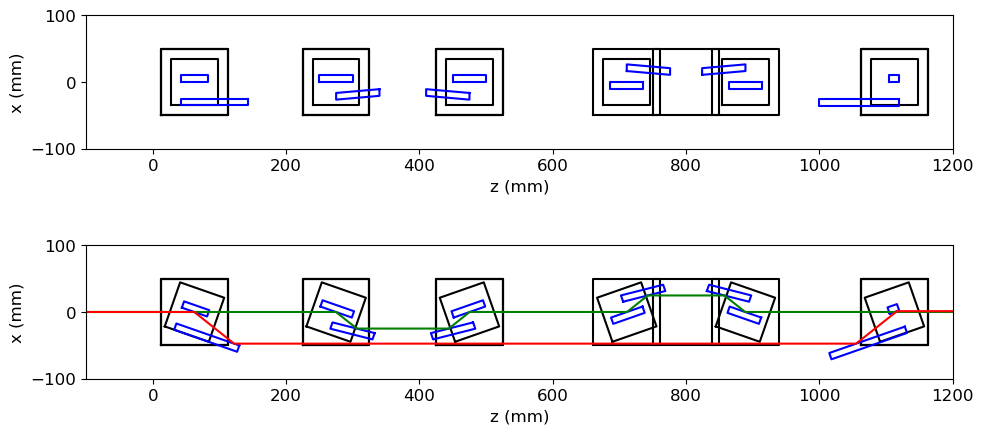

In [7]:
# Prepare a canvas. This section is not important. 
fig, ax = plt.subplots(ncols=1, nrows=2)
fig.set_figheight(5)
fig.set_figwidth(10)

#     Before alignment
x.plot_miniSD_table(ax=ax[0], xlim=None, ylim=None, show_trajectory=False)

#     After alignment
_ = x.align_miniSD()
x.plot_miniSD_table(ax=ax[1], xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

Get the most updated rocking curve around current location.


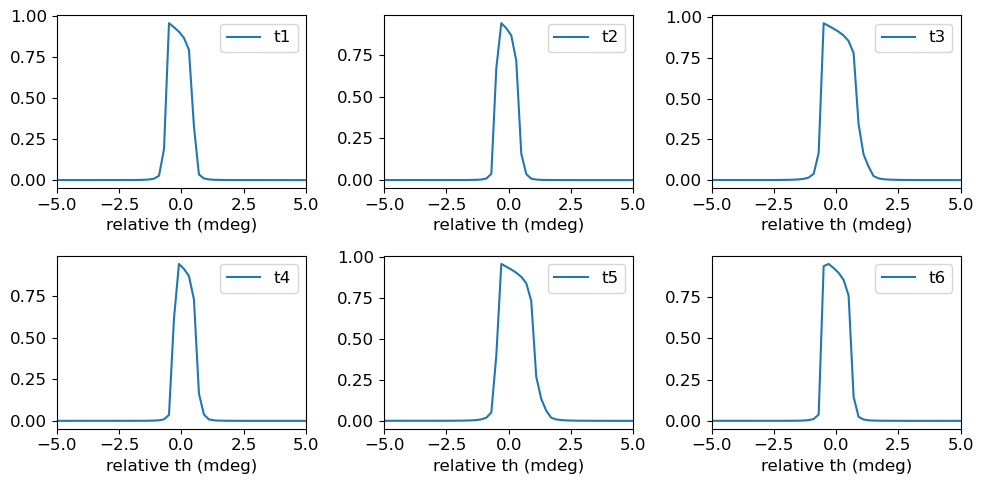

In [8]:
fig, ax = plt.subplots(ncols=3, nrows=2)
fig.set_figheight(5)
fig.set_figwidth(10)

x.plot_miniSD_rocking(ax_list=np.reshape(ax, 6))

plt.tight_layout()
plt.show()

# Step 1: Find the X-ray pulse after miniSD on the downstream YAG after the miniSD

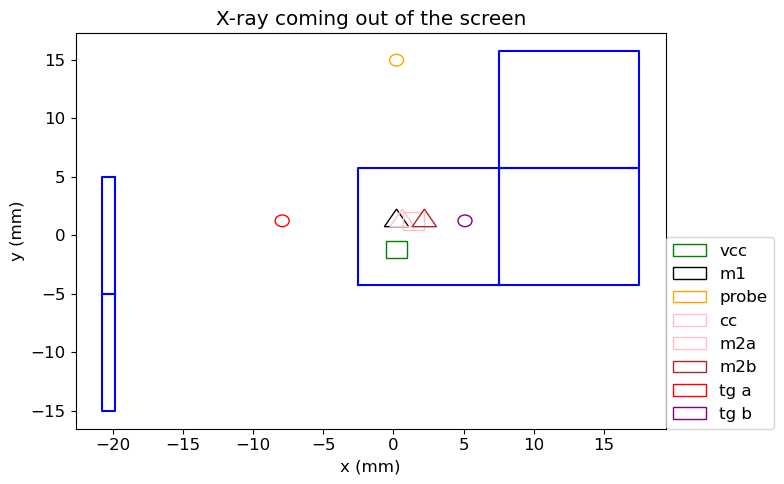

In [9]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(5)
fig.set_figwidth(8)

x.plot_beam_on_yag(ax=ax)

plt.tight_layout()
plt.show()

# Step 2: Align the probe beam such that it overlap with the CC beam
## Step 2a: Find the beam after the mirror 1 on the YAG


In [10]:
# Assume that we have calibrated the incident angle
_ = x.m1.pi_umv(np.deg2rad(0.1))

# Move the mirror position such that the interaction point with the mirror is at location z=4e6
path_ref = x.get_raytracing_trajectory(path="probe m1 only")
_ = x.m1.y_umvr(100)
path_new = x.get_raytracing_trajectory(path="probe m1 only")

coef = path_new[0][-2][2] - path_ref[0][-2][2]
total_diff = x.m1.optics.surface_point[2] - path_new[0][-2][2]
print("Move the TG-a pulse {:.5f} um in y axis by moving m1y 100 um".format(coef))
print("Need to move m1y {:.5f} um to compensate the total difference of {:.5f} um".format(
    total_diff / coef * 100, total_diff))
_ = x.m1.y_umvr(total_diff / coef * 100)

Motor moved from 0.00000 to 0.10000 degree
Motor moved from 0.0000 um to to 100.0000 um
Move the TG-a pulse -53732.10366 um in y axis by moving m1y 100 um
Need to move m1y -851.17261 um to compensate the total difference of 457352.94991 um
Motor moved from 100.0000 um to to -751.1726 um


Perform ray tracing calculation at current motor position.


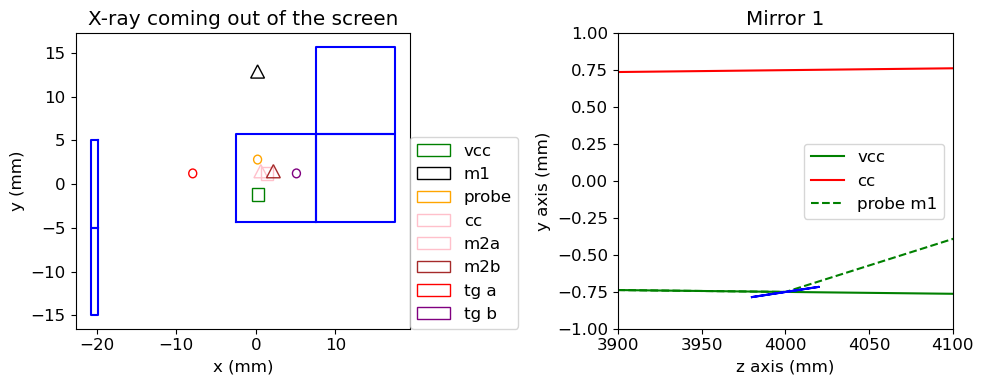

In [11]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=1)
fig.set_figheight(4)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0])
x.plot_m1_traj(ax=ax[1], axis='yz')

plt.tight_layout()
plt.show()

## Step 2b Align the silicon 111 crystal

Perform ray tracing calculation at current motor position.


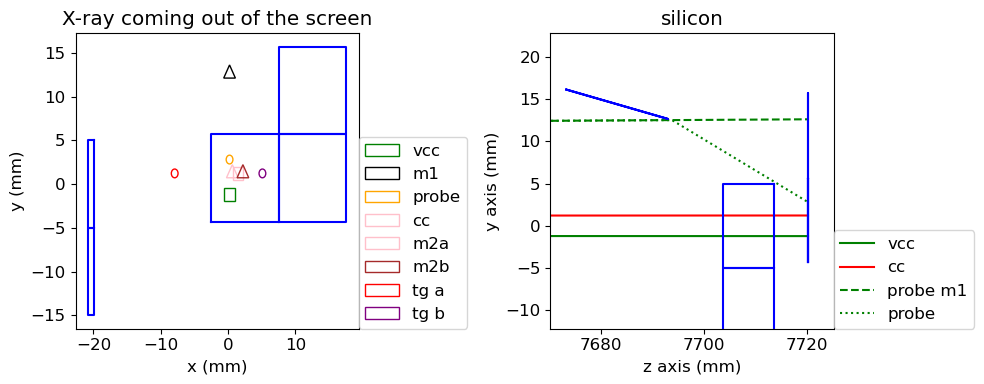

In [12]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=1)
fig.set_figheight(4)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0])
x.plot_si_traj(ax=ax[1], axis='yz')

plt.tight_layout()
plt.show()

### Align Bragg angle

In [13]:
# During operation, we need to make sure first that the X-ray is hiting on the si 111 crsytal
# Get the theoretical Bragg angle
bragg_si111 = util.get_bragg_angle(wave_length=np.pi * 2 / x.gaussian_pulse.klen0, plane_distance=Controller.si111['d'])

# Account for the 10 deg of the adaptor tilting
ang_diff = bragg_si111 - np.deg2rad(10)

# Rotate the crystal by the remaining angle
_ = x.si.pi_umv(ang_diff)

# Get the rocking curve from this crystal
(angles1, reflect_sigma1,
 reflect_pi1, b_factor1, kout1) = DeviceSimu.get_rocking_curve_around_axis(
    kin=x.gaussian_pulse.k0,
    scan_range=np.deg2rad(0.5),
    scan_number=10 ** 4,
    rotation_axis=x.si.pi.rotation_axis,
    h_initial=x.si.optics.h,
    normal_initial=x.si.optics.normal,
    thickness=x.si.optics.thickness,
    chi_dict=x.si.optics.chi_dict, )

# Get the target bragg peak
fwhm, angle_adjust, index = util.get_fwhm(coordinate=angles1,
                                          curve_values=np.square(np.abs(reflect_pi1)),
                                          center=True,
                                          get_index=True)

# Move the crystal to the target path
_ = x.si.pi_umv(target=x.si.pi.control_location + angle_adjust)

Motor moved from 0.00000 to 1.63904 degree
Motor moved from 1.63904 to 1.63974 degree


Perform ray tracing calculation at current motor position.


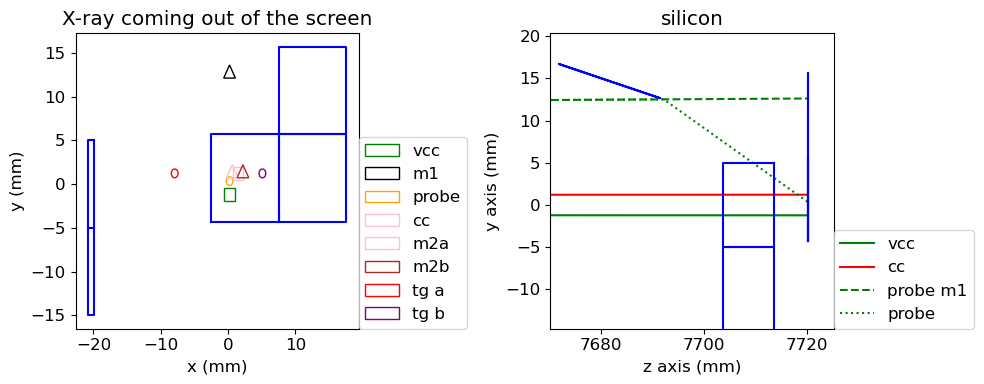

In [14]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=1)
fig.set_figheight(4)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0])
x.plot_si_traj(ax=ax[1], axis='yz')

plt.tight_layout()
plt.show()

### Align silicon position and overlap

In [15]:
# Align the vertical overlap with the reference pump pulse
probe_old_traj, kout, probe_old_path = x.get_raytracing_trajectory(path="probe")
_ = x.si.y_umvr(100)
probe_new_traj, kout, probe_new_path = x.get_raytracing_trajectory(path="probe")
pump_ref_traj, kout, pump_ref_path = x.get_raytracing_trajectory(path="cc")

coef = probe_new_traj[-1][0] - probe_old_traj[-1][0]
total_diff = pump_ref_traj[-1][0] - probe_new_traj[-1][0]

print("Move the probe pulse {:.5f} um in y axis by moving siy 100 um".format(coef))
print("Need to move siy {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                          total_diff))
_ = x.si.y_umvr(total_diff / coef * 100)

# Move the si111 crystal along the x axis
x_offset = probe_new_traj[-1][1] - x.si.optics.surface_point[1]
x.si.x_umvr(x_offset)

Motor moved from 0.0000 um to to 100.0000 um
Move the probe pulse 208.95550 um in y axis by moving siy 100 um
Need to move siy 321.19674 um to compensate the total difference of 671.15823 um
Motor moved from 100.0000 um to to 421.1967 um
Motor moved from 0.0000 um to to 218.0668 um


Perform ray tracing calculation at current motor position.


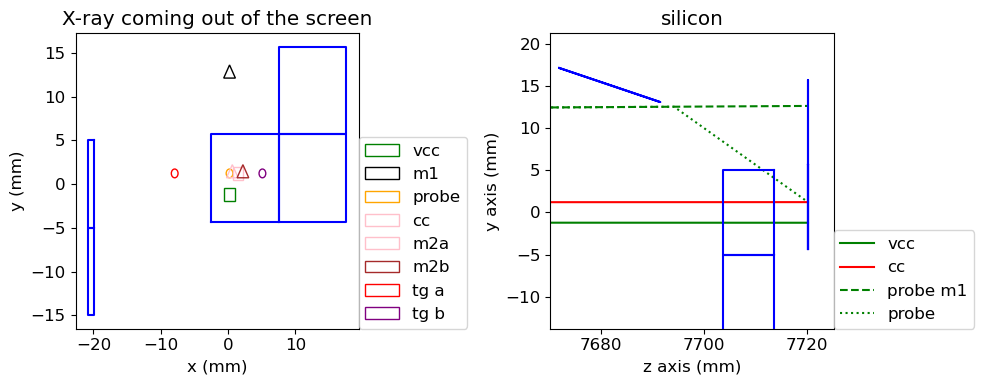

In [16]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=1)
fig.set_figheight(4)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0])
x.plot_si_traj(ax=ax[1], axis='yz')

plt.tight_layout()
plt.show()

### Align the horizontal position of the probe beam with the CC beam

In [17]:
move_yag()

# get current position of the beams on the yag
beam_pos_1 = x.get_beam_position_on_yag()
print("The different between probe beam and cc on the yag is")
print(beam_pos_1['probe'] - beam_pos_1['cc'])

# Walk the motors a little bit
move_vcc(100)

# get current position of the beams on the yag
beam_pos_2 = x.get_beam_position_on_yag()
print("The different between probe beam and cc on the yag is")
print(beam_pos_2['probe'] - beam_pos_2['cc'])

# get the dependence on the beam position and the motion of vcc motors
change = beam_pos_2['probe'] - beam_pos_1['probe']
print("The relative beam positions between the probe and cc beam changes")
print(change)
print("by changing the t2x and t3x by 100 um")

delta = (beam_pos_2['cc'] - beam_pos_2['probe'])[1] / change[1] * 100

print("The current total difference is", beam_pos_2['cc'] - beam_pos_2['probe'])
print("Needs to move {}um to elimiate the horizontal difference".format(delta))

move_vcc(delta)

beam_pos_3 = x.get_beam_position_on_yag()
print("After adjusting, the different between probe beam and cc on the yag is")
print(beam_pos_3['cc'] - beam_pos_3['probe'])

Move sample tower to yag
Move sample.z
Motor moved from 0.0000 um to to 0.0000 um
Move sample.x
Motor moved from 0.0000 um to to 0.0000 um
The different between probe beam and cc on the yag is
[ 3.22659825e-01 -1.19722822e+03 -9.31322575e-10]
Motor moved from 0.0000 um to to 100.0000 um
Motor moved from 0.0000 um to to -100.0000 um
The different between probe beam and cc on the yag is
[ 3.25238697e-01 -1.06347966e+03 -9.31322575e-10]
The relative beam positions between the probe and cc beam changes
[2.57887263e-03 1.33748564e+02 0.00000000e+00]
by changing the t2x and t3x by 100 um
The current total difference is [-3.25238697e-01  1.06347966e+03  9.31322575e-10]
Needs to move 795.1335140449202um to elimiate the horizontal difference
Motor moved from 100.0000 um to to 895.1335 um
Motor moved from -100.0000 um to to -895.1335 um
After adjusting, the different between probe beam and cc on the yag is
[-3.45765538e-01 -7.34164459e-01  9.31322575e-10]


# Step 3: Align the total reflection mirrors for the pump pulse

In [18]:
_ = x.m2a.yaw_umv(np.deg2rad(0.3))
_ = x.m2a.x_umv(0e3)

_ = x.m2b.yaw_umv(np.deg2rad(-0.3))
_ = x.m2b.x_umv(0e3)

Motor moved from 0.00000 to 0.30000 degree
Motor moved from 0.0000 um to to 0.0000 um
Motor moved from 0.00000 to -0.30000 degree
Motor moved from 0.0000 um to to 0.0000 um


Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.


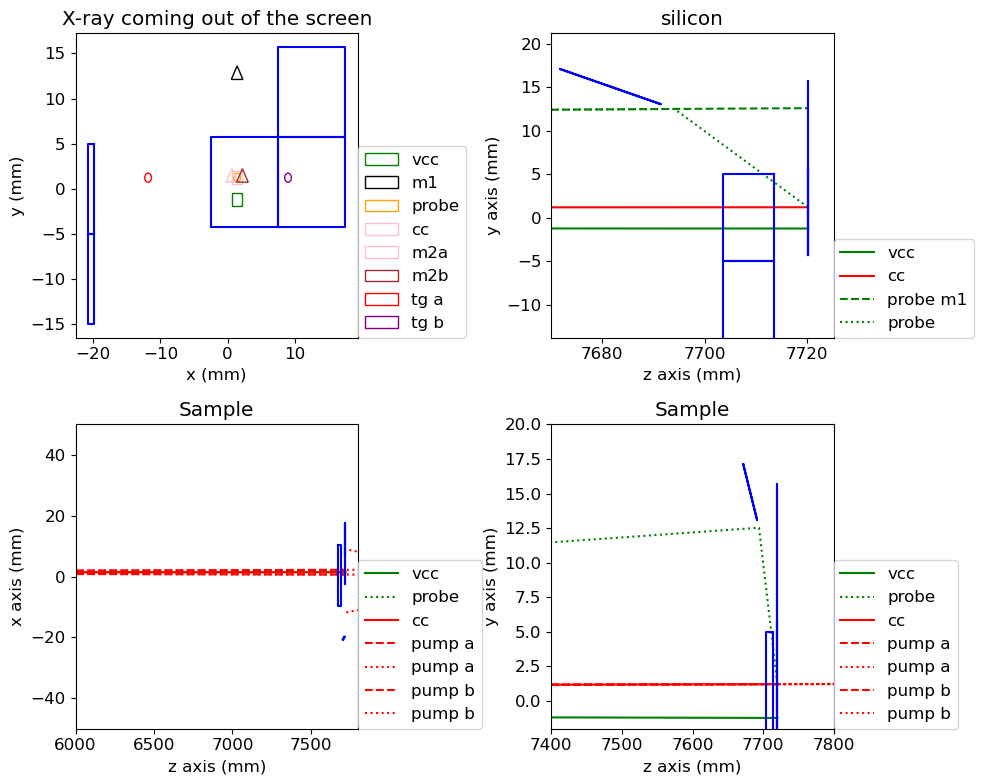

In [24]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.set_figheight(8)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0, 0])
x.plot_si_traj(ax=ax[0, 1], axis='yz')
x.plot_tg_traj(ax=ax[1, 0], axis='xz', xlim=[6000, 7800], ylim=[-50, 50])
x.plot_tg_traj(ax=ax[1, 1], axis='yz', xlim=[7400, 7800], ylim=[-2,20])

plt.tight_layout()
plt.show()

In [25]:
# Get the reference trajectory again
pump_ref, kout, pump_ref_path = x.get_raytracing_trajectory(path='cc')

print("Get trajectory a")
pump_a_traj, kout, pump_a_path = x.get_raytracing_trajectory(path='pump a')
_ = x.m2a.x_umvr(100)
pump_a_traj_new, kout, pump_a_path = x.get_raytracing_trajectory(path='pump a')
# Get the ratio
coef = pump_a_traj_new[-1][1] - pump_a_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_a_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                            total_diff))
_ = x.m2a.x_umvr(total_diff / coef * 100)

print("\n ")

print("Get trajectory b")
pump_b_traj, kout, pump_a_path = x.get_raytracing_trajectory(path='pump b')
_ = x.m2b.x_umvr(100)
pump_b_traj_new, kout, pump_b_path = x.get_raytracing_trajectory(path='pump b')
# Get the ratio
coef = pump_b_traj_new[-1][1] - pump_b_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_b_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                            total_diff))
_ = x.m2b.x_umvr(total_diff / coef * 100)

Get trajectory a
Motor moved from 0.0000 um to to 100.0000 um
Move the TG-a pulse 199.51665 um in x axis by moving m2a_x 100 um
Need to move m2a_x 6544.53542 um to compensate the total difference of 13057.43753 um
Motor moved from 100.0000 um to to 6644.5354 um

 
Get trajectory b
Motor moved from 0.0000 um to to 100.0000 um
Move the TG-a pulse 199.92985 um in x axis by moving m2a_x 100 um
Need to move m2a_x -3893.83917 um to compensate the total difference of -7784.94685 um
Motor moved from 100.0000 um to to -3793.8392 um


Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.


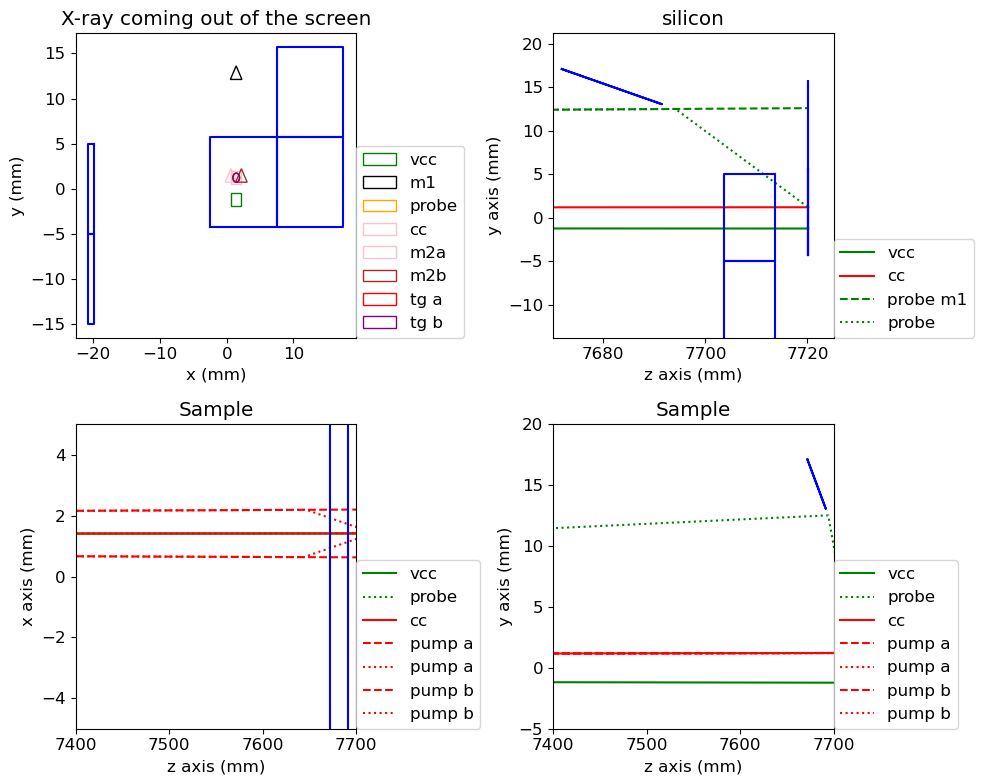

In [26]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.set_figheight(8)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0, 0])
x.plot_si_traj(ax=ax[0, 1], axis='yz')
x.plot_tg_traj(ax=ax[1, 0], axis='xz')
x.plot_tg_traj(ax=ax[1, 1], ylim=[-5, 20], axis='yz')

plt.tight_layout()
plt.show()

In [27]:
pathLenght = x.get_arrival_time()

In [28]:
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)

0.48239764024225146
-7416.68391280408


# Step 4: Find the X-ray beam on the sample YAG screen

In [29]:
# Step 1: Move the sample to the location of the YAG
move_sample()

Move sample tower to sample
Move sample.z
Motor moved from 0.0000 um to to 11565.5671 um
Move sample.x
Motor moved from 0.0000 um to to 22804.9636 um


Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.


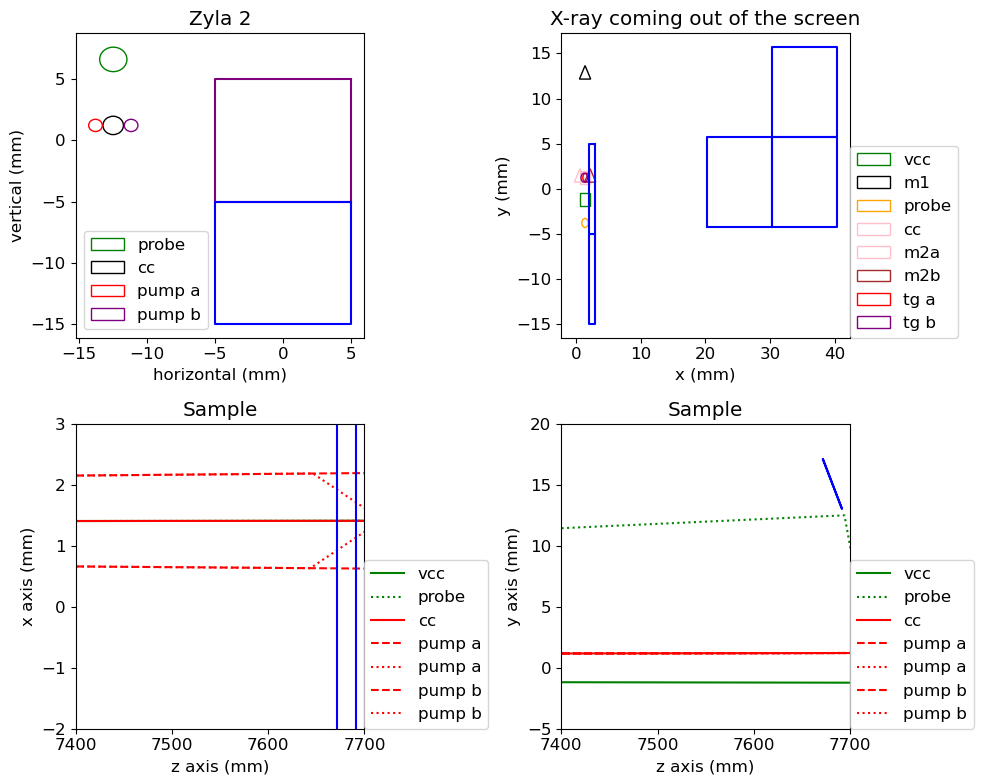

In [30]:
fig, axes = plt.subplots(ncols=2, nrows=2)

fig.set_figheight(8)
fig.set_figwidth(10)

x.plot_beam_on_sample_yag(ax=axes[0, 0])
x.plot_beam_on_yag(ax=axes[0, 1])
x.plot_tg_traj(ax=axes[1, 0], ylim=[-2, 3], axis='xz')
x.plot_tg_traj(ax=axes[1, 1], ylim=[-5, 20], axis='yz')

plt.tight_layout()
plt.show()

In [31]:
# Check the spatial separation of the probe and pump
beam_path_sample = x.get_beam_position_on_sample_yag()

In [32]:
beam_path_sample['probe'] - beam_path_sample['cc']

array([5.39541953e+03, 6.88398917e-01, 7.86843563e+00])

# Step 5: Refine the spatial overlap

In [33]:
x.sample.x_umvr(-1)

Motor moved from 22804.9636 um to to 22803.9636 um


In [34]:
x.sample.x_umvr(-1)

Motor moved from 22803.9636 um to to 22802.9636 um


In [35]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

array([5.38660564e+03, 6.88473829e-01, 7.86929188e+00])

Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.


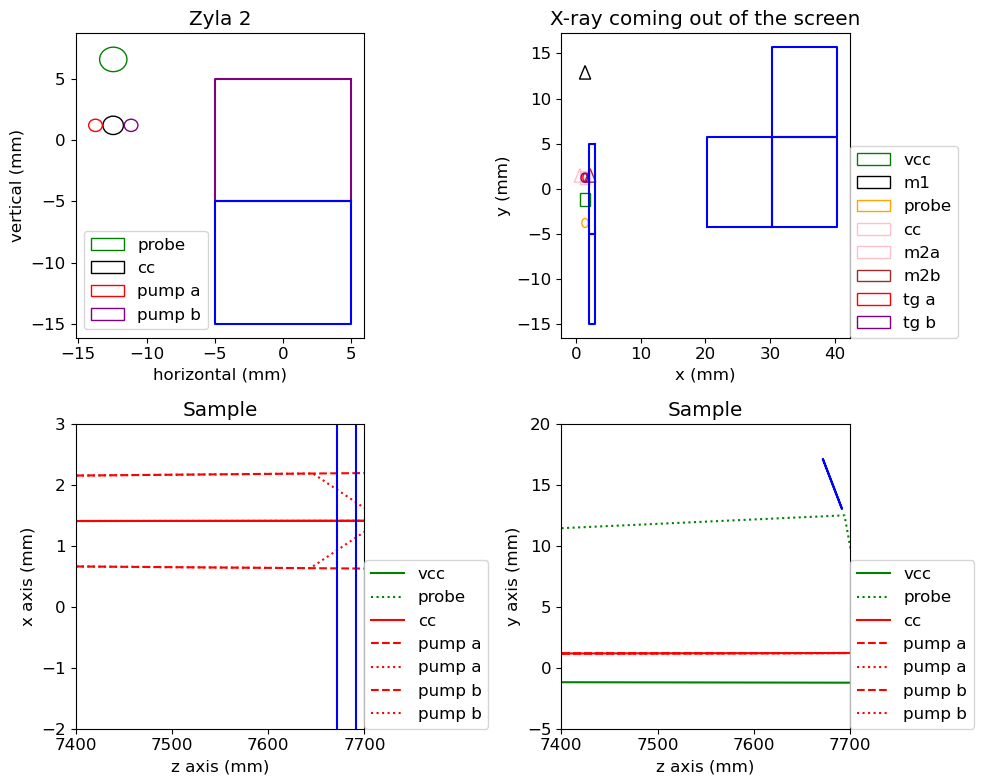

In [36]:
fig, axes = plt.subplots(ncols=2, nrows=2)

fig.set_figheight(8)
fig.set_figwidth(10)

x.plot_beam_on_sample_yag(ax=axes[0, 0])
x.plot_beam_on_yag(ax=axes[0, 1])
x.plot_tg_traj(ax=axes[1, 0], ylim=[-2, 3], axis='xz')
x.plot_tg_traj(ax=axes[1, 1], ylim=[-5, 20], axis='yz')

plt.tight_layout()
plt.show()

In [37]:
x.sample.z_umvr(-1)

Motor moved from 11565.5671 um to to 11564.5671 um


In [38]:
x.sample.z_umv(11565.5671)

Motor moved from 11564.5671 um to to 11565.5671 um


201000000000.0

In [39]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

array([5.38661203e+03, 6.88473775e-01, 7.86929126e+00])

### It seems that by ajusting the position of the sample stage motors, one cannot achieve good quality overlap

In [40]:
x.sample.z_umv(11565.5671)
x.sample.x_umv(21650.9636)

Motor moved from 11565.5671 um to to 11565.5671 um
Motor moved from 22802.9636 um to to 21650.9636 um


576000000000.0

In [41]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

array([-336.531921  ,    0.73711666,    8.425282  ])

In [42]:
x.si.y_umvr(-1)

Motor moved from 421.1967 um to to 420.1967 um


In [43]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

array([-338.59893876,    0.73712225,    8.42534587])

In [44]:
x.si.roll.user_get_position()

0.0

In [45]:
x.si.roll.control_limits

array([-0.08726646,  0.08726646])

In [46]:
x.si.roll_umv(np.deg2rad(0.0))

Motor moved from 0.00000 to 0.00000 degree


0.0

In [47]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

array([-338.06911363,    0.62567378,    7.15148397])

In [48]:
x.sample.x_umvr(1)

Motor moved from 21650.9636 um to to 21651.9636 um


In [49]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

array([-329.70594545,    0.62568273,    7.15158628])

Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.


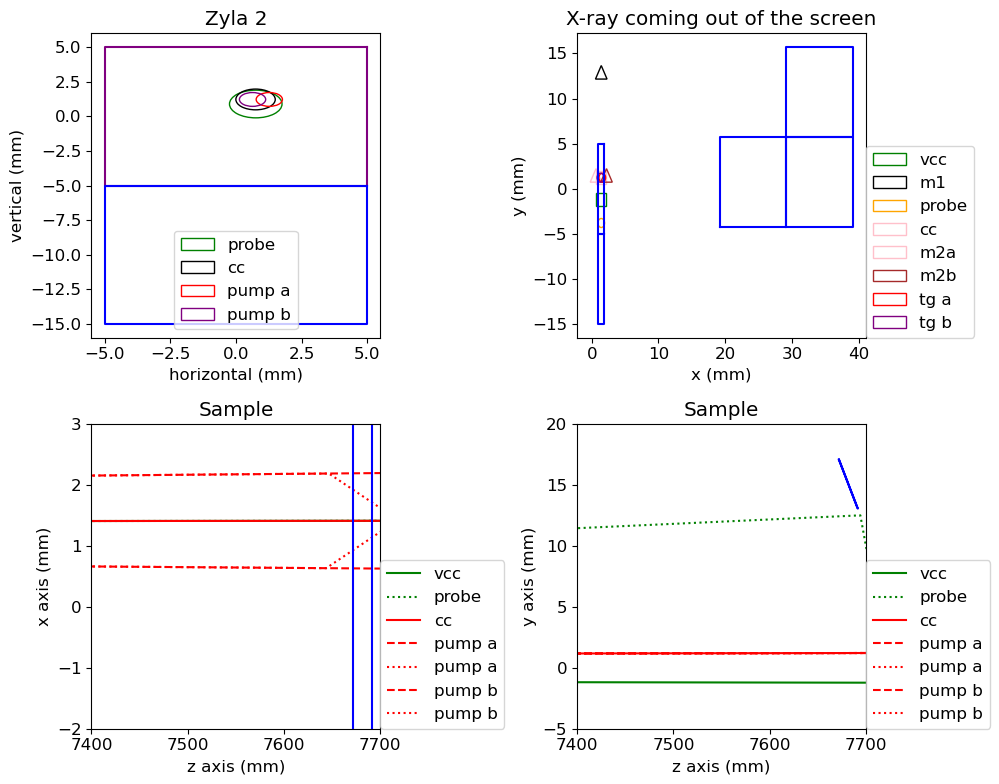

In [50]:
fig, axes = plt.subplots(ncols=2, nrows=2)

fig.set_figheight(8)
fig.set_figwidth(10)

x.plot_beam_on_sample_yag(ax=axes[0, 0])
x.plot_beam_on_yag(ax=axes[0, 1])
x.plot_tg_traj(ax=axes[1, 0], ylim=[-2, 3], axis='xz')
x.plot_tg_traj(ax=axes[1, 1], ylim=[-5, 20], axis='yz')

plt.tight_layout()
plt.show()

# Step 6: Find the delay time

In [51]:
pathLenght = x.get_arrival_time()

In [52]:
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)

0.4851353128718122
-10901.319813421847


# Step 7: Calculate the Ewarld sphere and Q space coverage during rotation

In [53]:
10 / np.arcsin(np.deg2rad(5))

114.44579986172813

In [54]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['pump a'] - beam_path_sample['pump b']

array([8.04426698e-02, 5.56112657e+01, 6.35639676e+02])

In [55]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['pump a'] - beam_path_sample['cc']

array([6.64521005e-02, 4.55714549e+01, 5.20884113e+02])

In [56]:
beam_path_sample = x.get_beam_position_on_sample_yag()
beam_path_sample['pump b'] - beam_path_sample['cc']

array([-1.39905693e-02, -1.00398108e+01, -1.14755563e+02])

In [57]:
x.m2a.x_umvr(-1)

Motor moved from 6644.5354 um to to 6643.5354 um


In [58]:
x.m2a.x_umvr(1)

Motor moved from 6643.5354 um to to 6644.5354 um


In [59]:
beam_path_sample = x.get_beam_position_on_sample_yag()
print(beam_path_sample['pump a'] - beam_path_sample['cc'])
print(beam_path_sample['pump b'] - beam_path_sample['cc'])

[6.45306382e-02 4.42433150e+01 5.05703405e+02]
[-1.39905693e-02 -1.00398108e+01 -1.14755563e+02]


In [60]:
pathLenght = x.get_path_length()
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c / 1000)

AttributeError: 'XppController_TG' object has no attribute 'get_path_length'

In [ ]:
(beam_path_sample['pump a'] - beam_path_sample['pump b']) / util.c

In [ ]:
1 / np.tan(np.deg2rad(5)) / util.c